In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [3]:
train_df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

In [5]:
test_df = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

In [7]:
train_df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [8]:
test_df.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


In [10]:
train_df.tail(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [11]:
test_df.tail(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
990,991,1807,0,1.2,0,4,0,37,0.8,162,...,11,246,932,2741,7,1,9,1,1,1
991,992,1797,1,2.6,0,4,0,42,0.6,174,...,20,57,1169,3359,16,6,18,1,1,1
992,993,1895,0,0.5,1,0,1,62,0.9,99,...,0,1019,1698,2563,10,8,13,1,0,1
993,994,567,1,2.7,1,14,1,56,0.4,165,...,17,555,1290,336,7,6,7,1,1,1
994,995,936,1,1.4,1,0,0,46,0.8,139,...,0,265,886,684,8,5,12,1,1,1
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0
999,1000,1270,1,0.5,0,4,1,35,0.1,140,...,19,457,608,2828,9,2,3,1,0,1


In [12]:
train_df_array = train_df.to_numpy()

In [13]:
test_df_array = test_df.to_numpy()

In [14]:
train_df, test_df

(      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
 0               842     0          2.2         0   1       0           7   
 1              1021     1          0.5         1   0       1          53   
 2               563     1          0.5         1   2       1          41   
 3               615     1          2.5         0   0       0          10   
 4              1821     1          1.2         0  13       1          44   
 ...             ...   ...          ...       ...  ..     ...         ...   
 1995            794     1          0.5         1   0       1           2   
 1996           1965     1          2.6         1   0       0          39   
 1997           1911     0          0.9         1   1       1          36   
 1998           1512     0          0.9         0   4       1          46   
 1999            510     1          2.0         1   5       1          45   
 
       m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

Data Cleaning

In [17]:
# Check missing values

missing_values = train_df.iloc[:, :10].isnull().sum()

missing_values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
dtype: int64

In [18]:
# Check missing values

missing_values = test_df.iloc[:, :10].isnull().sum()

missing_values

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
dtype: int64

Data Visualization  - First 10 rows of train_df

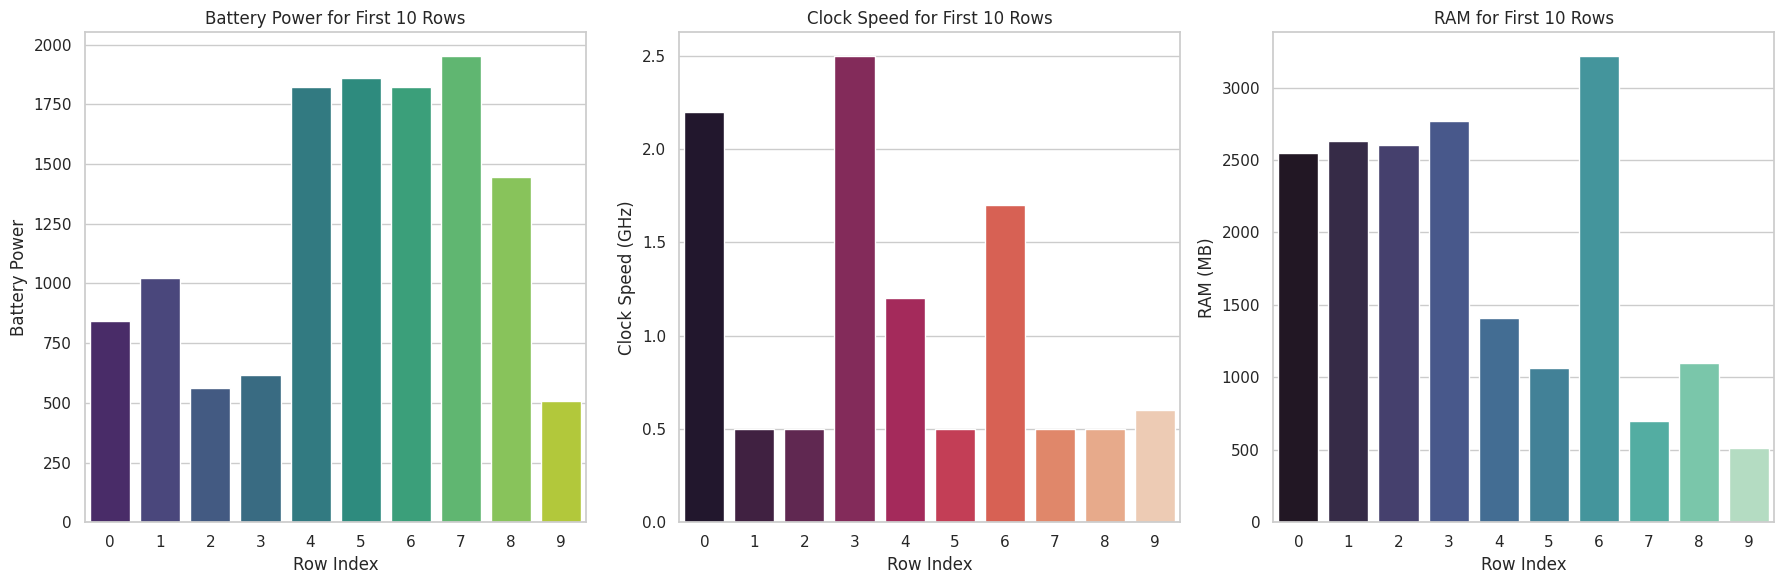

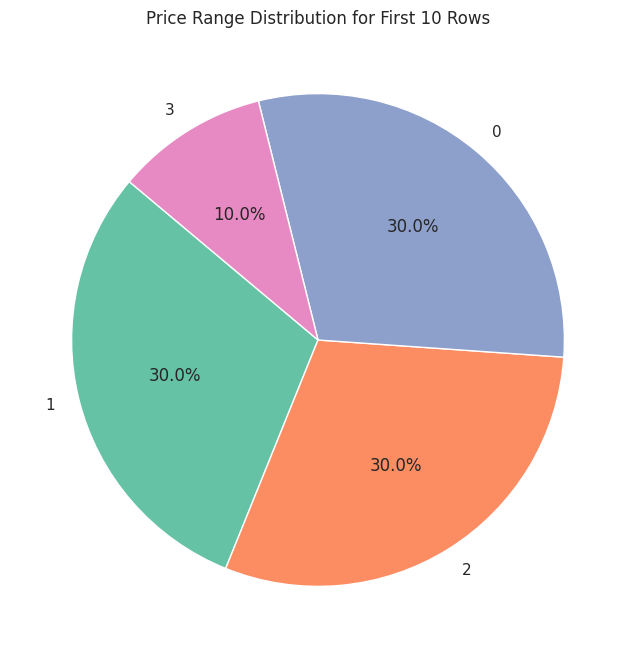

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

train_df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

test_df = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

# Setting style for seaborn
sns.set(style="whitegrid")

# Extracting the first 10 rows for visualization
train_df_subset = train_df.head(10)
test_df_subset = test_df.head(10)

# Plotting for train_df
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Battery Power
sns.barplot(x=train_df_subset.index, y="battery_power", data=train_df_subset, ax=ax[0], palette="viridis")
ax[0].set_title('Battery Power for First 10 Rows')
ax[0].set_ylabel('Battery Power')
ax[0].set_xlabel('Row Index')

# Clock Speed
sns.barplot(x=train_df_subset.index, y="clock_speed", data=train_df_subset, ax=ax[1], palette="rocket")
ax[1].set_title('Clock Speed for First 10 Rows')
ax[1].set_ylabel('Clock Speed (GHz)')
ax[1].set_xlabel('Row Index')

# RAM
sns.barplot(x=train_df_subset.index, y="ram", data=train_df_subset, ax=ax[2], palette="mako")
ax[2].set_title('RAM for First 10 Rows')
ax[2].set_ylabel('RAM (MB)')
ax[2].set_xlabel('Row Index')

plt.tight_layout()
plt.show()

# Pie Chart for Price Range distribution in the first 10 rows
price_range_counts = train_df_subset['price_range'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Price Range Distribution for First 10 Rows')
plt.show()

Data Visualization  - First 10 rows of test_df

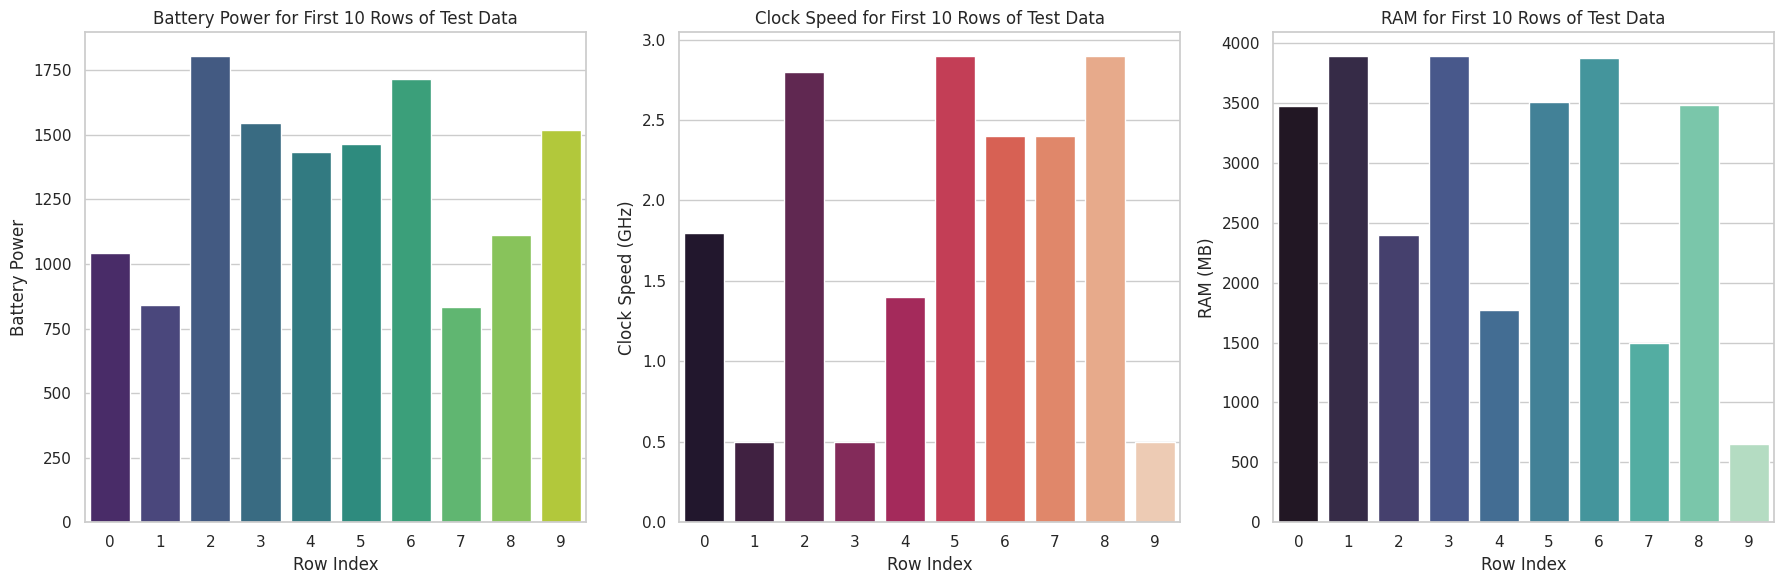

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

train_df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

test_df = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

# Plotting for test_df
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Battery Power
sns.barplot(x=test_df_subset.index, y="battery_power", data=test_df_subset, ax=ax[0], palette="viridis")
ax[0].set_title('Battery Power for First 10 Rows of Test Data')
ax[0].set_ylabel('Battery Power')
ax[0].set_xlabel('Row Index')

# Clock Speed
sns.barplot(x=test_df_subset.index, y="clock_speed", data=test_df_subset, ax=ax[1], palette="rocket")
ax[1].set_title('Clock Speed for First 10 Rows of Test Data')
ax[1].set_ylabel('Clock Speed (GHz)')
ax[1].set_xlabel('Row Index')

# RAM
sns.barplot(x=test_df_subset.index, y="ram", data=test_df_subset, ax=ax[2], palette="mako")
ax[2].set_title('RAM for First 10 Rows of Test Data')
ax[2].set_ylabel('RAM (MB)')
ax[2].set_xlabel('Row Index')

plt.tight_layout()
plt.show()

Machine Learning

Converting train and test data from pandas dataframes to numpy arrays

In [23]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

test_df = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

# For the train data, separating the features and the target variable
X_train = train_df.drop('price_range', axis=1).values
y_train = train_df['price_range'].values

# For the test data, we keep all columns except 'id' as it is not a feature
X_test = test_df.drop('id', axis=1).values

# Inspect the shape of these arrays to ensure they are correctly formatted
(X_train.shape, y_train.shape, X_test.shape)

((2000, 20), (2000,), (1000, 20))

The inspection by manually calculating basic statistics for the training data

In [26]:
import pandas as pd
import numpy as np

# Data Inspection in NumPy

train_df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

test_df = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

# Checking for missing values in training and test data
missing_values_train_df = np.isnan(X_train).sum()
missing_values_test_df = np.isnan(X_test).sum()

# Checking for unique values in the target to understand classification categories
unique_targets = np.unique(y_train)

# Correcting the approach for basic statistics of the training data
mean_values = np.mean(X_train, axis=0)
std_values = np.std(X_train, axis=0)
min_values = np.min(X_train, axis=0)
max_values = np.max(X_train, axis=0)

# Compile the statistics into a dictionary for a clearer overview
train_stats = {
    "Mean": mean_values,
    "STD": std_values,
    "Min": min_values,
    "Max": max_values
}

missing_values_train, missing_values_test, unique_targets, train_stats

(0,
 0,
 array([0, 1, 2, 3]),
 {'Mean': array([1.2385185e+03, 4.9500000e-01, 1.5222500e+00, 5.0950000e-01,
         4.3095000e+00, 5.2150000e-01, 3.2046500e+01, 5.0175000e-01,
         1.4024900e+02, 4.5205000e+00, 9.9165000e+00, 6.4510800e+02,
         1.2515155e+03, 2.1242130e+03, 1.2306500e+01, 5.7670000e+00,
         1.1011000e+01, 7.6150000e-01, 5.0300000e-01, 5.0700000e-01]),
  'STD': array([4.39308338e+02, 4.99974999e-01, 8.15800182e-01, 4.99909742e-01,
         4.34035825e+00, 4.99537536e-01, 1.81411780e+01, 2.88343437e-01,
         3.53908039e+01, 2.28726469e+00, 6.06279867e+00, 4.43669852e+02,
         4.32091384e+02, 1.08446083e+03, 4.21219156e+00, 4.35530837e+00,
         5.46258904e+00, 4.26166341e-01, 4.99991000e-01, 4.99950998e-01]),
  'Min': array([5.01e+02, 0.00e+00, 5.00e-01, 0.00e+00, 0.00e+00, 0.00e+00,
         2.00e+00, 1.00e-01, 8.00e+01, 1.00e+00, 0.00e+00, 0.00e+00,
         5.00e+02, 2.56e+02, 5.00e+00, 0.00e+00, 2.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00

In [30]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [31]:
test_df.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [27]:
print(train_df.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [28]:
print(test_df.columns)

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


Histogram - The distribution of RAM in mobile phones within the dataset

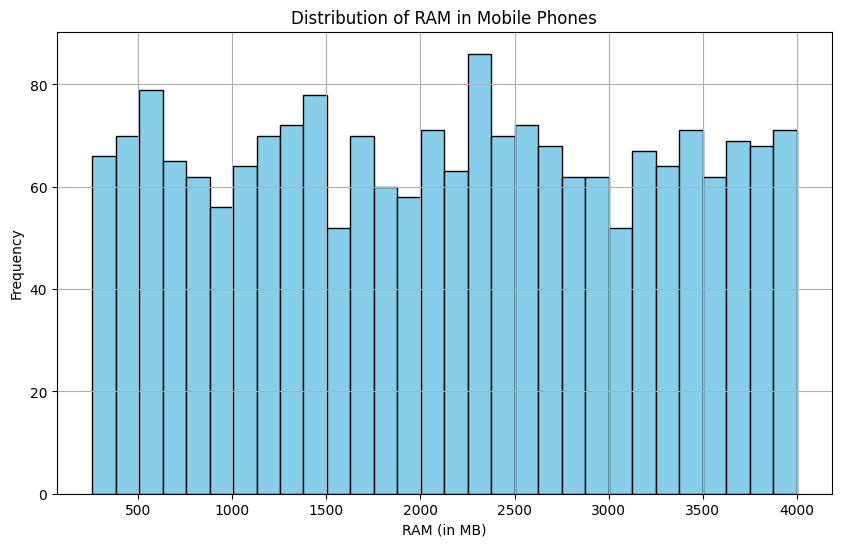

In [32]:
import matplotlib.pyplot as plt

# Visualizing the distribution of 'ram' - using the 13th column in X_train
ram_values = X_train[:, 13]  # Assuming 'ram' is the 14th feature in the dataset

plt.figure(figsize=(10, 6))
plt.hist(ram_values, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of RAM in Mobile Phones')
plt.xlabel('RAM (in MB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Using the simple k-Nearest Neighbors (k-NN) algorithm that implemented, the predicted price range category for a single test sample from our dataset is 3

In [33]:
def euclidean_distance(row1, row2):
    """
    Calculate the Euclidean distance between two vectors.
    """
    distance = np.sqrt(np.sum((row1 - row2) ** 2))
    return distance

def k_nearest_neighbors(X_train, y_train, test_sample, k=3):
    """
    Predict the class for a single test sample based on k nearest neighbors.
    """
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], test_sample)
        distances.append((y_train[i], dist))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    
    # Majority vote
    classes = [neighbor[0] for neighbor in neighbors]
    prediction = max(set(classes), key=classes.count)
    return prediction

# Example prediction for a single test sample
test_sample = X_test[0]
predicted_class = k_nearest_neighbors(X_train, y_train, test_sample, k=3)
predicted_class

3

Model Evaluation

In [34]:
from sklearn.model_selection import train_test_split

# Step 1: Splitting the Training Data into new training set and validation set
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Verify the size of the new training and validation sets
X_train_new.shape, X_val.shape, y_train_new.shape, y_val.shape

((1600, 20), (400, 20), (1600,), (400,))

With k=3, the k-Nearest Neighbors algorithm achieved an accuracy of 92.75% on the validation set. This indicates a strong performance, suggesting that the model is quite effective at predicting the price range of mobile phones based on their features.

Hyperparameter Tuning

In [35]:
def evaluate_knn(X_train, y_train, X_val, y_val, k=3):
    """
    Evaluate the k-NN algorithm on the validation set and return the accuracy.
    """
    correct = 0
    for i in range(len(X_val)):
        prediction = k_nearest_neighbors(X_train, y_train, X_val[i], k)
        if prediction == y_val[i]:
            correct += 1
    accuracy = correct / len(X_val)
    return accuracy

# Evaluate the model with k=3
accuracy_k3 = evaluate_knn(X_train_new, y_train_new, X_val, y_val, k=3)
accuracy_k3

0.9275

Hyperparameter Tuning: Experimenting with a limited range of k values

In [36]:
k_values = range(1, 16)  # Keeping the same range for k values
accuracies = []

# Evaluate on a smaller subset of the validation set for efficiency
subset_indices = np.random.choice(np.arange(len(X_val)), size=100, replace=False)
X_val_subset = X_val[subset_indices]
y_val_subset = y_val[subset_indices]

for k in k_values:
    acc = evaluate_knn(X_train_new, y_train_new, X_val_subset, y_val_subset, k=k)
    accuracies.append(acc)

# Finding the k value with the highest accuracy
max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]

optimal_k, max_accuracy, accuracies

(9,
 0.95,
 [0.91,
  0.9,
  0.94,
  0.92,
  0.92,
  0.93,
  0.93,
  0.93,
  0.95,
  0.94,
  0.94,
  0.92,
  0.93,
  0.92,
  0.93])

 The hyperparameter tuning using GridSearchCV

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

# Step 1: Implementing k-NN using scikit-learn
knn = KNeighborsClassifier(n_neighbors=3)

# Step 2: Evaluate the model using cross-validation with reduced folds
cv_scores = cross_val_score(knn, X_train_new, y_train_new, cv=3, scoring='accuracy')  # Reduced to 3 folds

# Step 3: Hyperparameter Tuning with GridSearchCV with a narrower range of k and reduced folds
param_grid = {'n_neighbors': list(range(1, 11))}  # Narrower range of k values
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')  # Reduced to 3 folds for quicker computation
grid_search.fit(X_train_new, y_train_new)

best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

cv_scores, best_k, best_score

(array([0.90449438, 0.90619137, 0.89681051]), 9, 0.9231202554030725)